<a href="https://colab.research.google.com/github/ajinkyamorade/Topic-Modeling-on-News-Articles/blob/main/Topic_Modeling_on_News_Articles_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

## <b> Data Description </b>

### The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.

In [3]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import accuracy_score, classification_report
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Importing the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project/Topic modelling on news articles/bbc.csv')

#First Look of Data

In [7]:
data.head()

Unnamed: 0                                               news      type
0           0  Yukos unit buyer faces loan claim\n \n The own...  business
1           1  Ad sales boost Time Warner profit\n \n Quarter...  business
2           2  Dollar gains on Greenspan speech\n \n The doll...  business
3           3  US trade gap hits record in 2004\n \n The gap ...  business
4           4  High fuel prices hit BA's profits\n \n British...  business

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2225 non-null   int64 
 1   news        2225 non-null   object
 2   type        2225 non-null   object
dtypes: int64(1), object(2)
memory usage: 52.3+ KB


In [9]:
data.shape

(2225, 3)

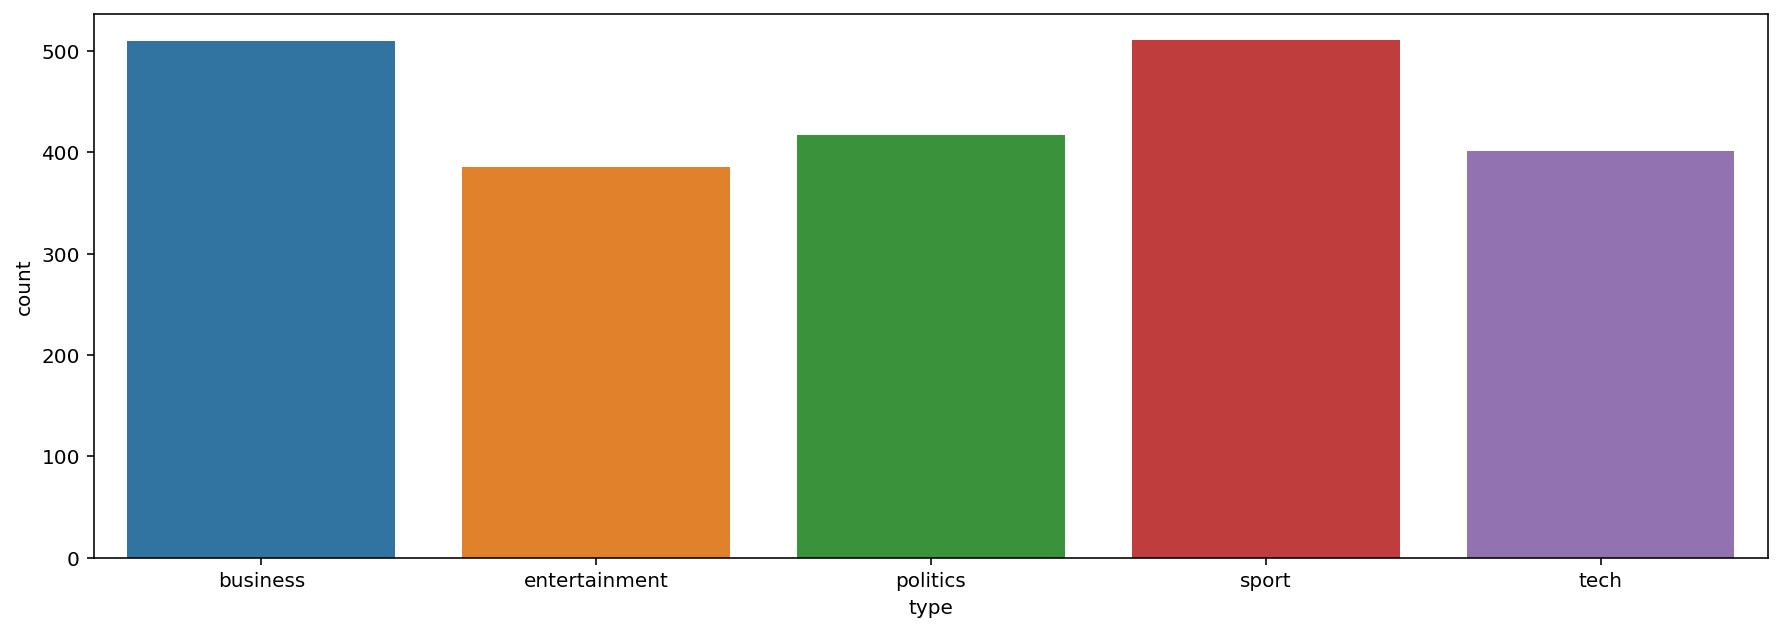

In [10]:
plt.figure(figsize=(15, 5))
sns.countplot(data.type)

In [11]:
data['News_length'] = data['news'].str.len()
print(data['News_length'])

0       1557
1       2569
2       2258
3       1960
4       2411
        ... 
2220    2526
2221    2857
2222    2334
2223    3594
2224    1889
Name: News_length, Length: 2225, dtype: int64


In [12]:
data.head()

Unnamed: 0                                               news      type  \
0           0  Yukos unit buyer faces loan claim\n \n The own...  business   
1           1  Ad sales boost Time Warner profit\n \n Quarter...  business   
2           2  Dollar gains on Greenspan speech\n \n The doll...  business   
3           3  US trade gap hits record in 2004\n \n The gap ...  business   
4           4  High fuel prices hit BA's profits\n \n British...  business   

   News_length  
0         1557  
1         2569  
2         2258  
3         1960  
4         2411

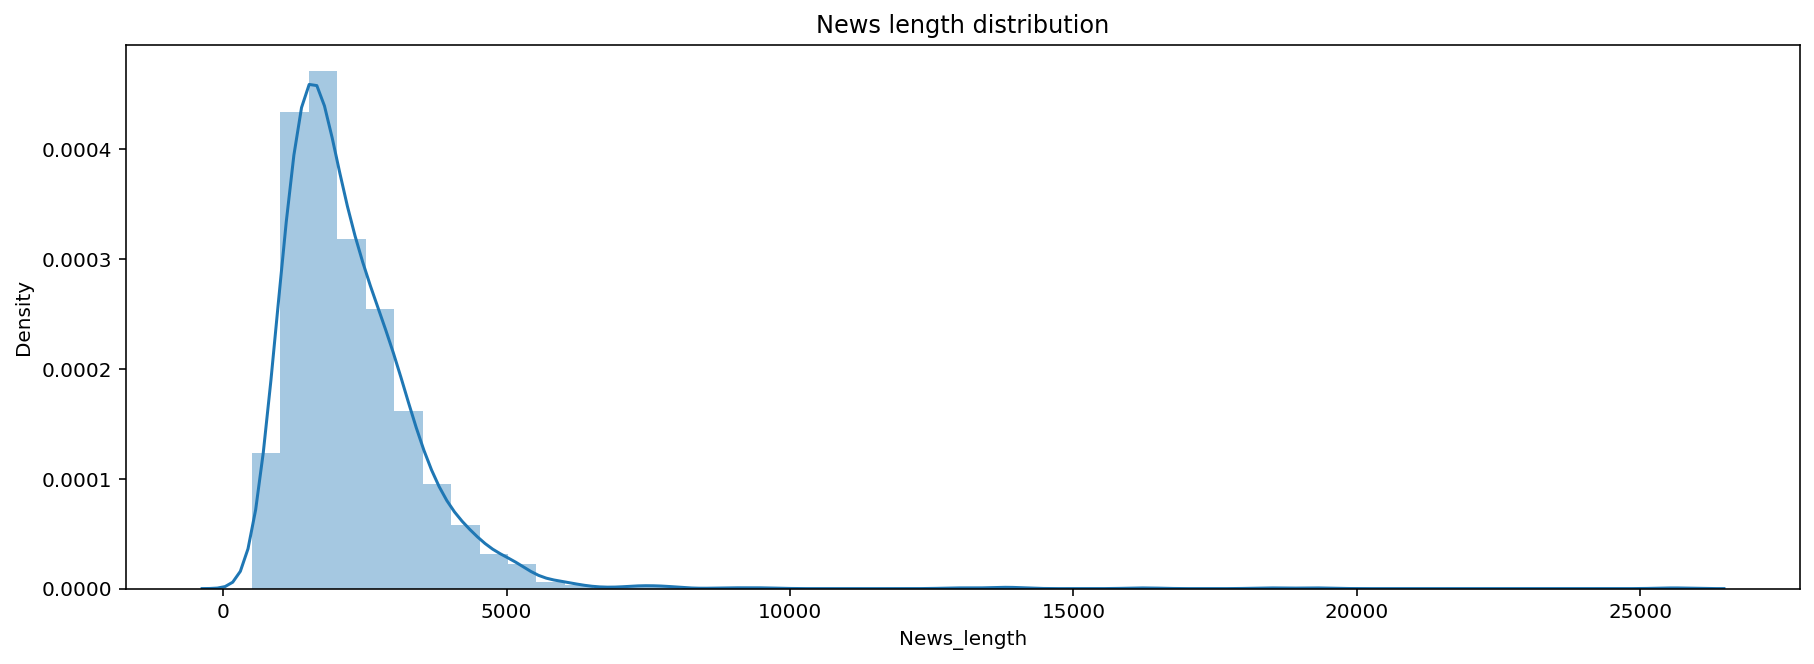

In [13]:
plt.figure(figsize=(15, 5))
sns.distplot(data['News_length']).set_title('News length distribution');

#Funtion to remove punctuation

In [14]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [15]:
data['news'] = data['news'].apply(remove_punctuation)
data.head(10)

Unnamed: 0                                               news      type  \
0           0  Yukos unit buyer faces loan claim\n \n The own...  business   
1           1  Ad sales boost Time Warner profit\n \n Quarter...  business   
2           2  Dollar gains on Greenspan speech\n \n The doll...  business   
3           3  US trade gap hits record in 2004\n \n The gap ...  business   
4           4  High fuel prices hit BAs profits\n \n British ...  business   
5           5  India widens access to telecoms\n \n India has...  business   
6           6  Yukos loses US bankruptcy battle\n \n A judge ...  business   
7           7  Ask Jeeves tips online ad revival\n \n Ask Jee...  business   
8           8  Indonesians face fuel price rise\n \n Indonesi...  business   
9           9  Telegraph newspapers axe 90 jobs\n \n The Dail...  business   

   News_length  
0         1557  
1         2569  
2         2258  
3         1960  
4         2411  
5         1738  
6         2717  
7         1149  
8         1852  
9         2996

#Removeing Stop Words From Data

In [16]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
sw = stopwords[:]

In [18]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [19]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [20]:
data['news'] = data['news'].apply(stopwords)
data.head(10)

Unnamed: 0                                               news      type  \
0           0  yukos unit buyer faces loan claim owners embat...  business   
1           1  ad sales boost time warner profit quarterly pr...  business   
2           2  dollar gains greenspan speech dollar hit highe...  business   
3           3  us trade gap hits record 2004 gap us exports i...  business   
4           4  high fuel prices hit bas profits british airwa...  business   
5           5  india widens access telecoms india raised limi...  business   
6           6  yukos loses us bankruptcy battle judge dismiss...  business   
7           7  ask jeeves tips online ad revival ask jeeves b...  business   
8           8  indonesians face fuel price rise indonesias go...  business   
9           9  telegraph newspapers axe 90 jobs daily sunday ...  business   

   News_length  
0         1557  
1         2569  
2         2258  
3         1960  
4         2411  
5         1738  
6         2717  
7         1149  
8         1852  
9         2996

#Collect vocabulary count

In [21]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(data['news'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [22]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

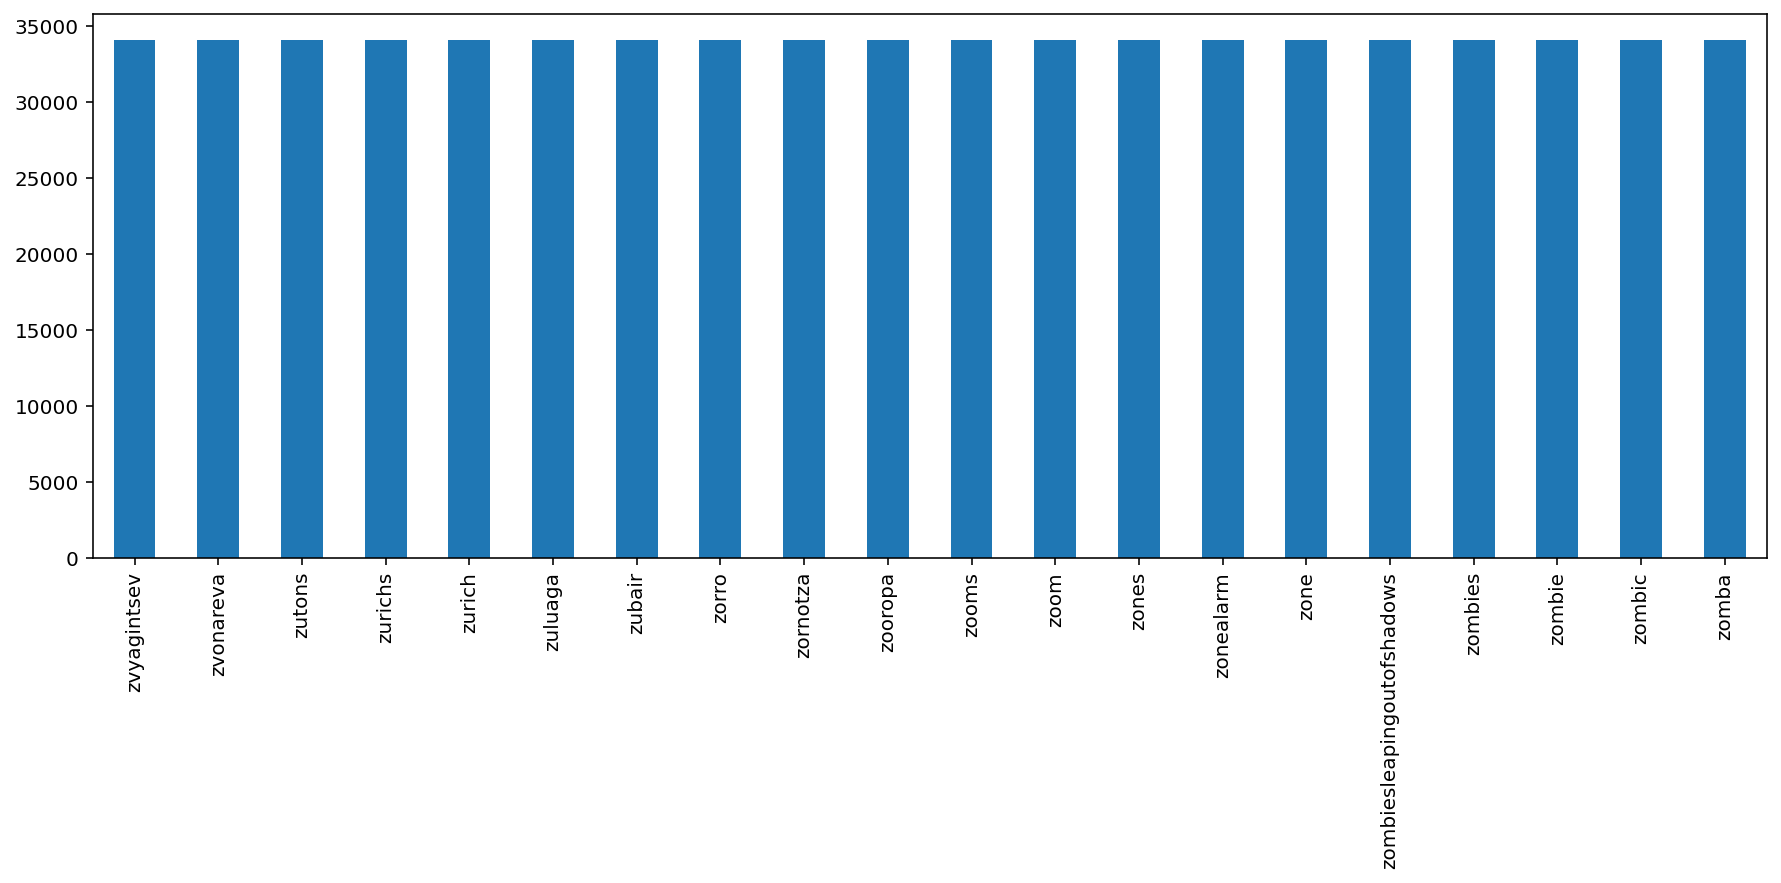

In [23]:
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

In [24]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [25]:
data['news'] = data['news'].apply(stemming)
data.head(10)

Unnamed: 0                                               news      type  \
0           0  yuko unit buyer face loan claim owner embattl ...  business   
1           1  ad sale boost time warner profit quarter profi...  business   
2           2  dollar gain greenspan speech dollar hit highes...  business   
3           3  us trade gap hit record 2004 gap us export imp...  business   
4           4  high fuel price hit bas profit british airway ...  business   
5           5  india widen access telecom india rais limit fo...  business   
6           6  yuko lose us bankruptci battl judg dismiss att...  business   
7           7  ask jeev tip onlin ad reviv ask jeev becom thi...  business   
8           8  indonesian face fuel price rise indonesia gove...  business   
9           9  telegraph newspap axe 90 job daili sunday tele...  business   

   News_length  
0         1557  
1         2569  
2         2258  
3         1960  
4         2411  
5         1738  
6         2717  
7         1149  
8         1852  
9         2996

In [26]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words = 'english')

# fit the vectorizer using the text data
tfid_vectorizer.fit(data['news'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

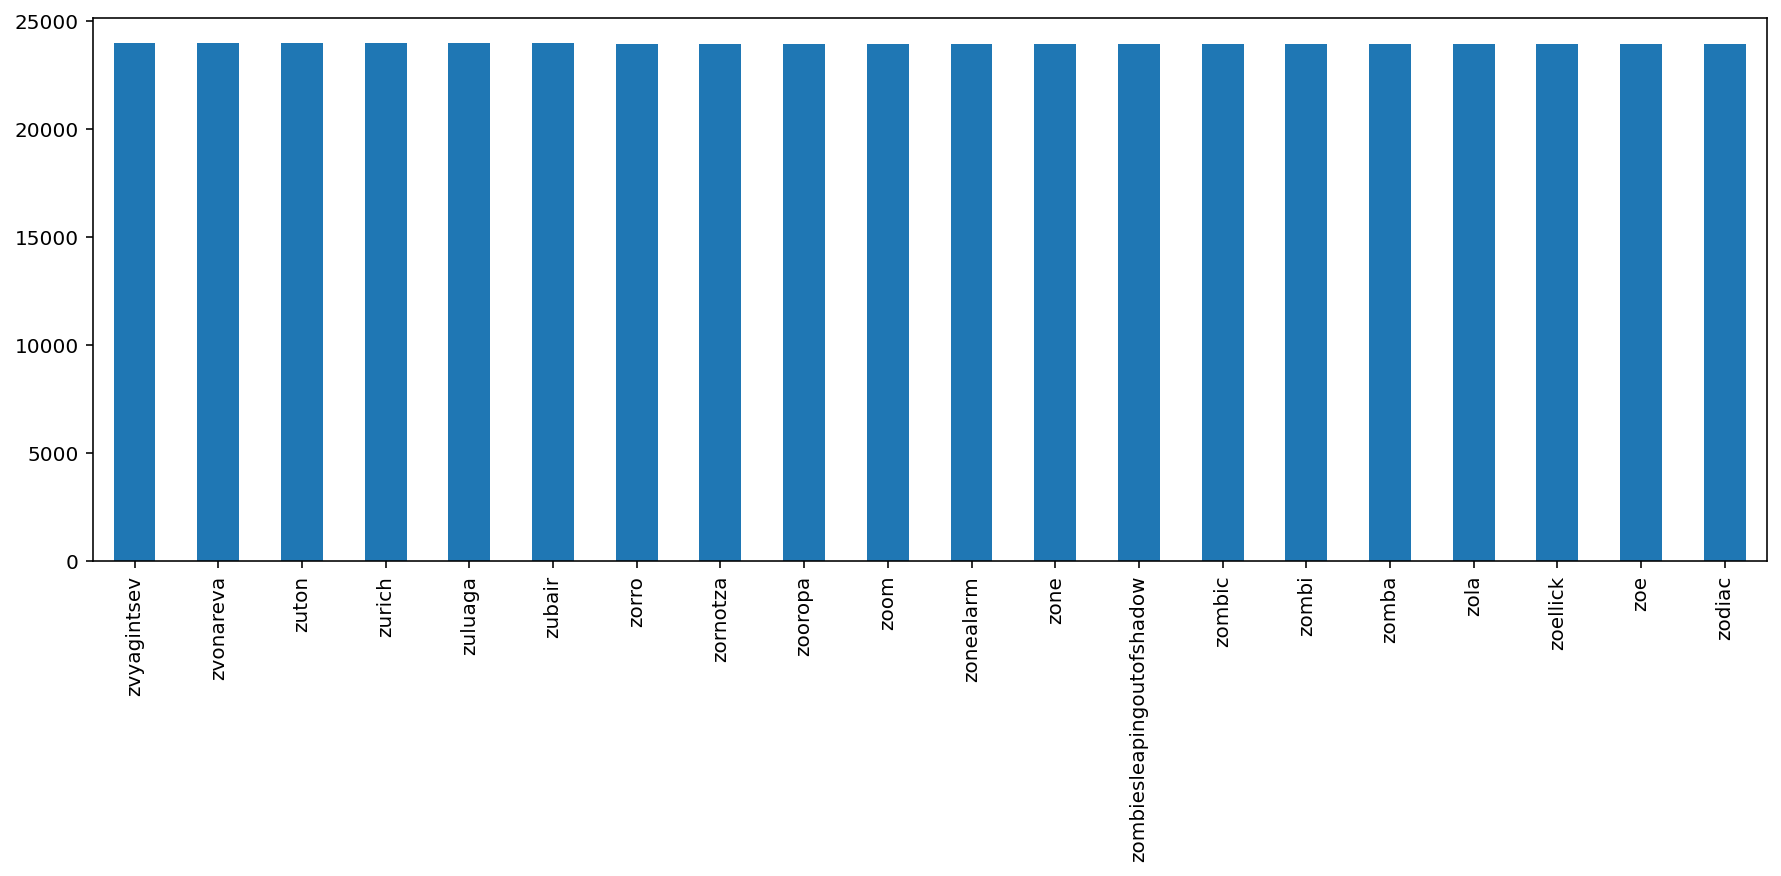

In [27]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

In [28]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [29]:
data['length'] = data['news'].apply(length)
data.head(10)

Unnamed: 0                                               news      type  \
0           0  yuko unit buyer face loan claim owner embattl ...  business   
1           1  ad sale boost time warner profit quarter profi...  business   
2           2  dollar gain greenspan speech dollar hit highes...  business   
3           3  us trade gap hit record 2004 gap us export imp...  business   
4           4  high fuel price hit bas profit british airway ...  business   
5           5  india widen access telecom india rais limit fo...  business   
6           6  yuko lose us bankruptci battl judg dismiss att...  business   
7           7  ask jeev tip onlin ad reviv ask jeev becom thi...  business   
8           8  indonesian face fuel price rise indonesia gove...  business   
9           9  telegraph newspap axe 90 job daili sunday tele...  business   

   News_length  length  
0         1557    1005  
1         2569    1626  
2         2258    1458  
3         1960    1272  
4         2411    1620  
5         1738    1136  
6         2717    1675  
7         1149     702  
8         1852    1214  
9         2996    1884

In [30]:
Business_data = data[data['type'] == 'business']
Entertainment_data = data[data['type'] == 'entertainment']
Politics_data = data[data['type'] == 'politics']
Sport_data = data[data['type'] == 'sport']
Tech_data = data[data['type'] == 'tech']

In [31]:
Business_data

Unnamed: 0                                               news      type  \
0             0  yuko unit buyer face loan claim owner embattl ...  business   
1             1  ad sale boost time warner profit quarter profi...  business   
2             2  dollar gain greenspan speech dollar hit highes...  business   
3             3  us trade gap hit record 2004 gap us export imp...  business   
4             4  high fuel price hit bas profit british airway ...  business   
..          ...                                                ...       ...   
505         505  china top trader japan china overtook us becom...  business   
506         506  uk economi end year spurt uk economi grew esti...  business   
507         507  euro firm miss optim 90 larg compani around wo...  business   
508         508  aid climat top davo agenda climat chang fight ...  business   
509         509  healthsouth exboss goe trial former head us me...  business   

     News_length  length  
0           1557    1005  
1           2569    1626  
2           2258    1458  
3           1960    1272  
4           2411    1620  
..           ...     ...  
505         1491     989  
506         2850    1780  
507         2631    1589  
508         2727    1661  
509         1407     905  

[510 rows x 5 columns]

#Count of words in Business data

In [32]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words = 'english')

# fit the vectorizer using the text data
tfid_vectorizer.fit(Business_data['news'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

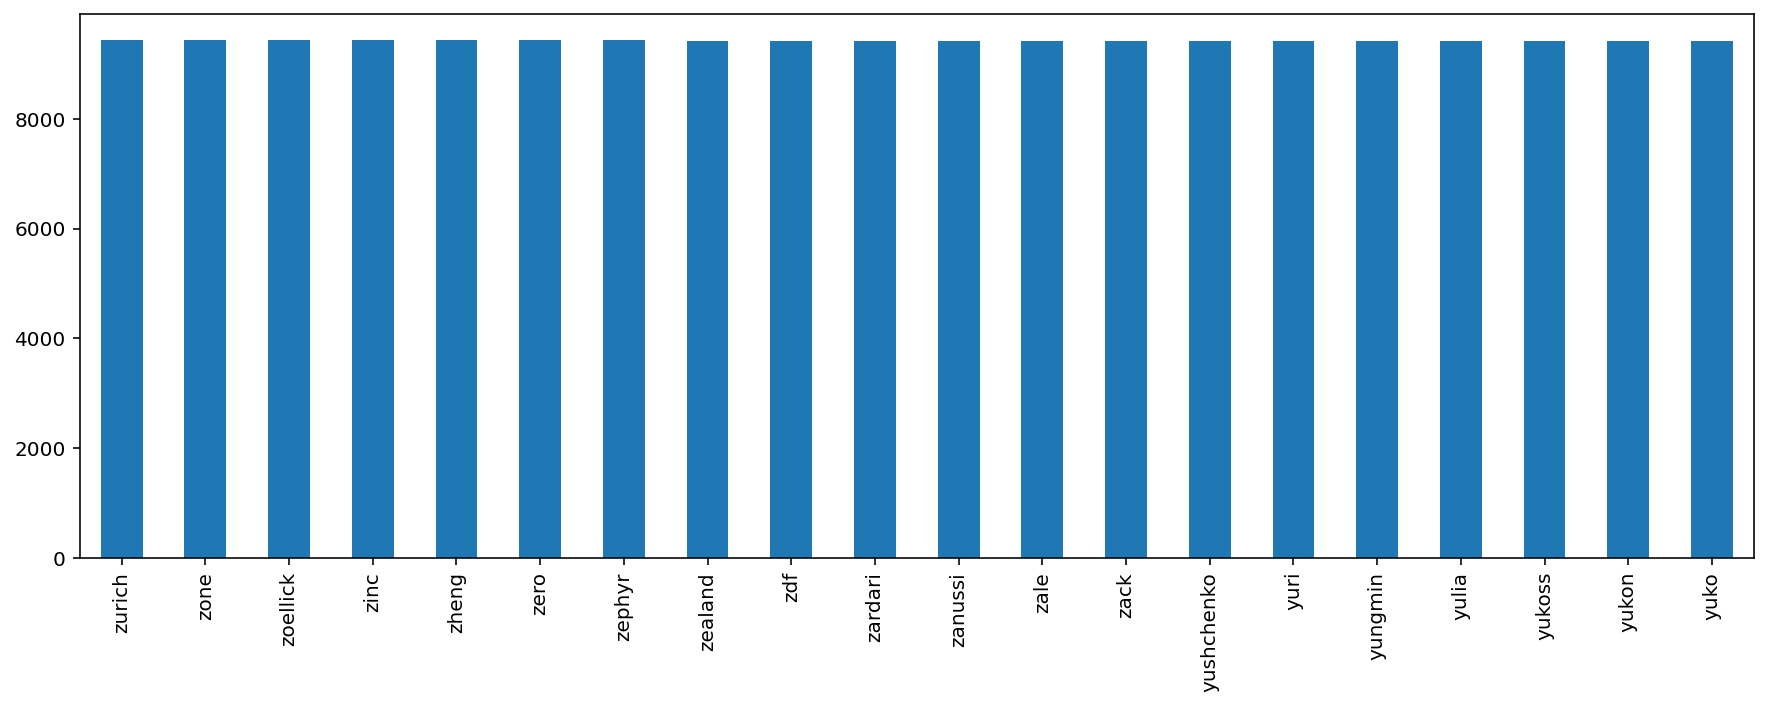

In [33]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

#Count of words in Entertainment data

In [34]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words = 'english')

# fit the vectorizer using the text data
tfid_vectorizer.fit(Entertainment_data['news'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

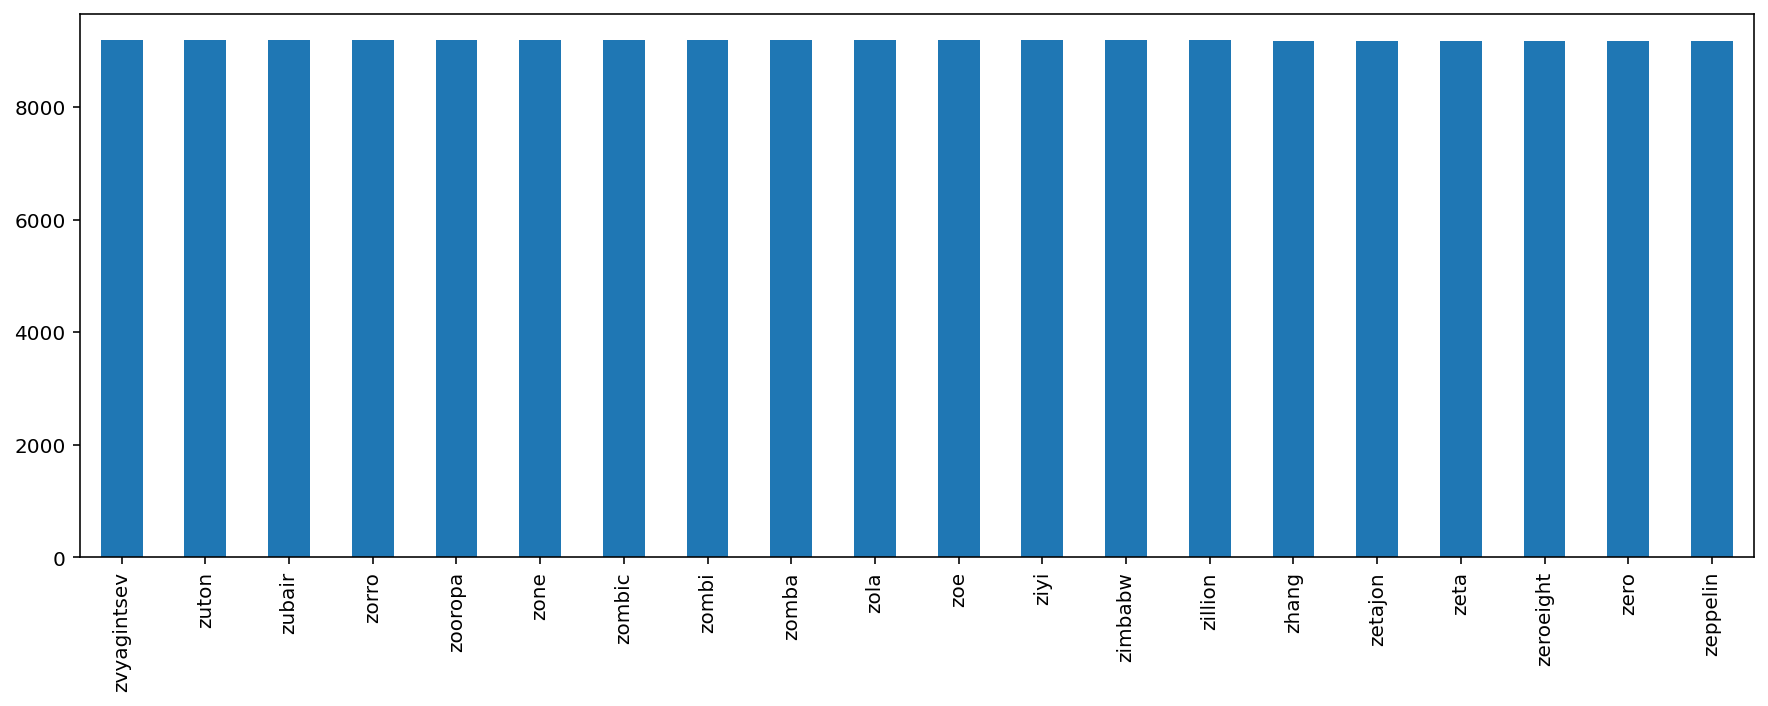

In [35]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

#Count of words in Politics data

In [36]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words = 'english')

# fit the vectorizer using the text data
tfid_vectorizer.fit(Politics_data['news'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

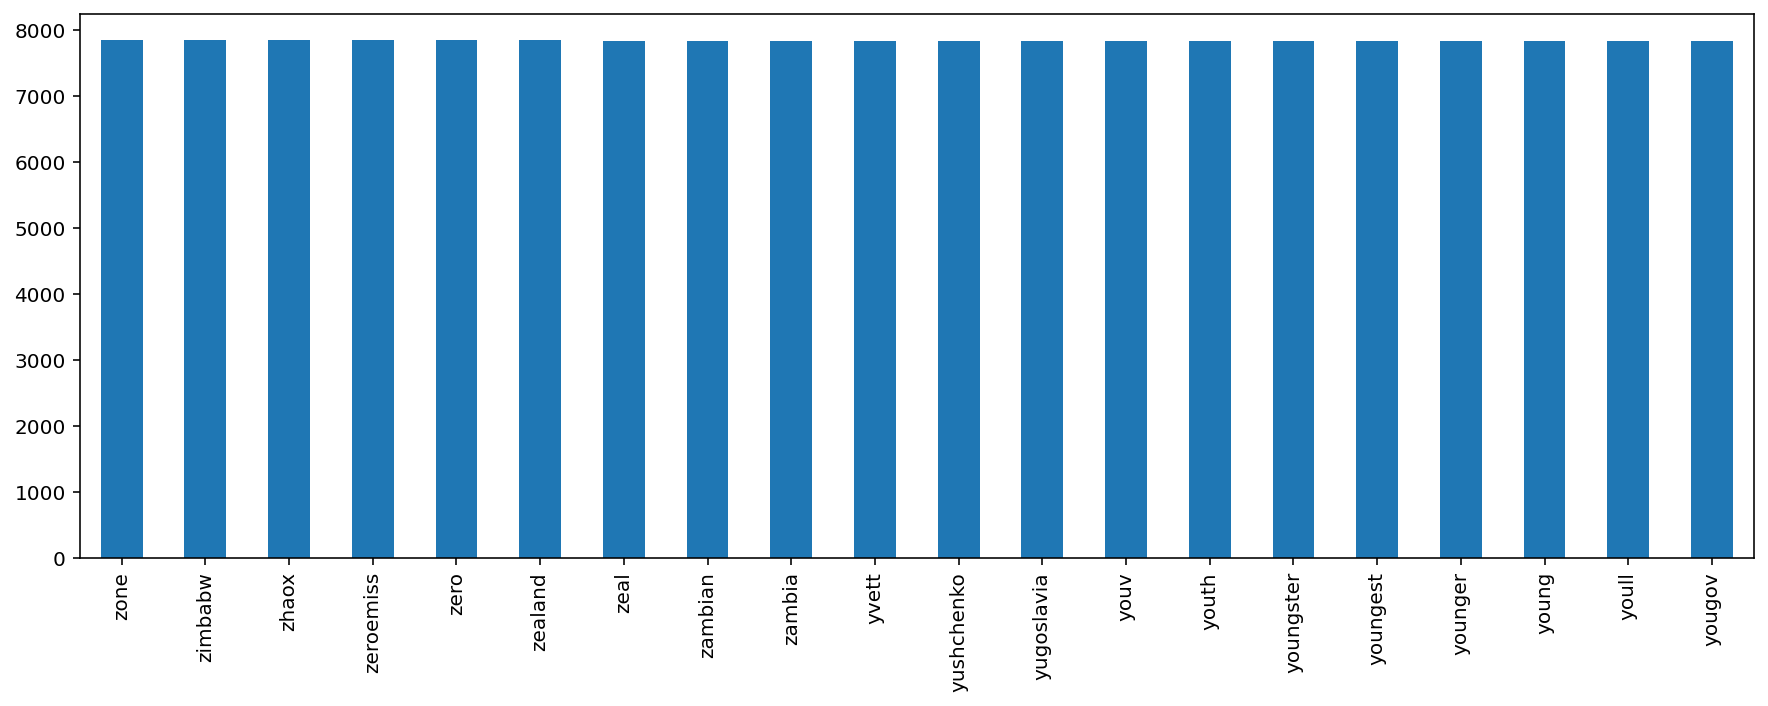

In [37]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

#Count of words in Sport data

In [38]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words = 'english')

# fit the vectorizer using the text data
tfid_vectorizer.fit(Sport_data['news'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

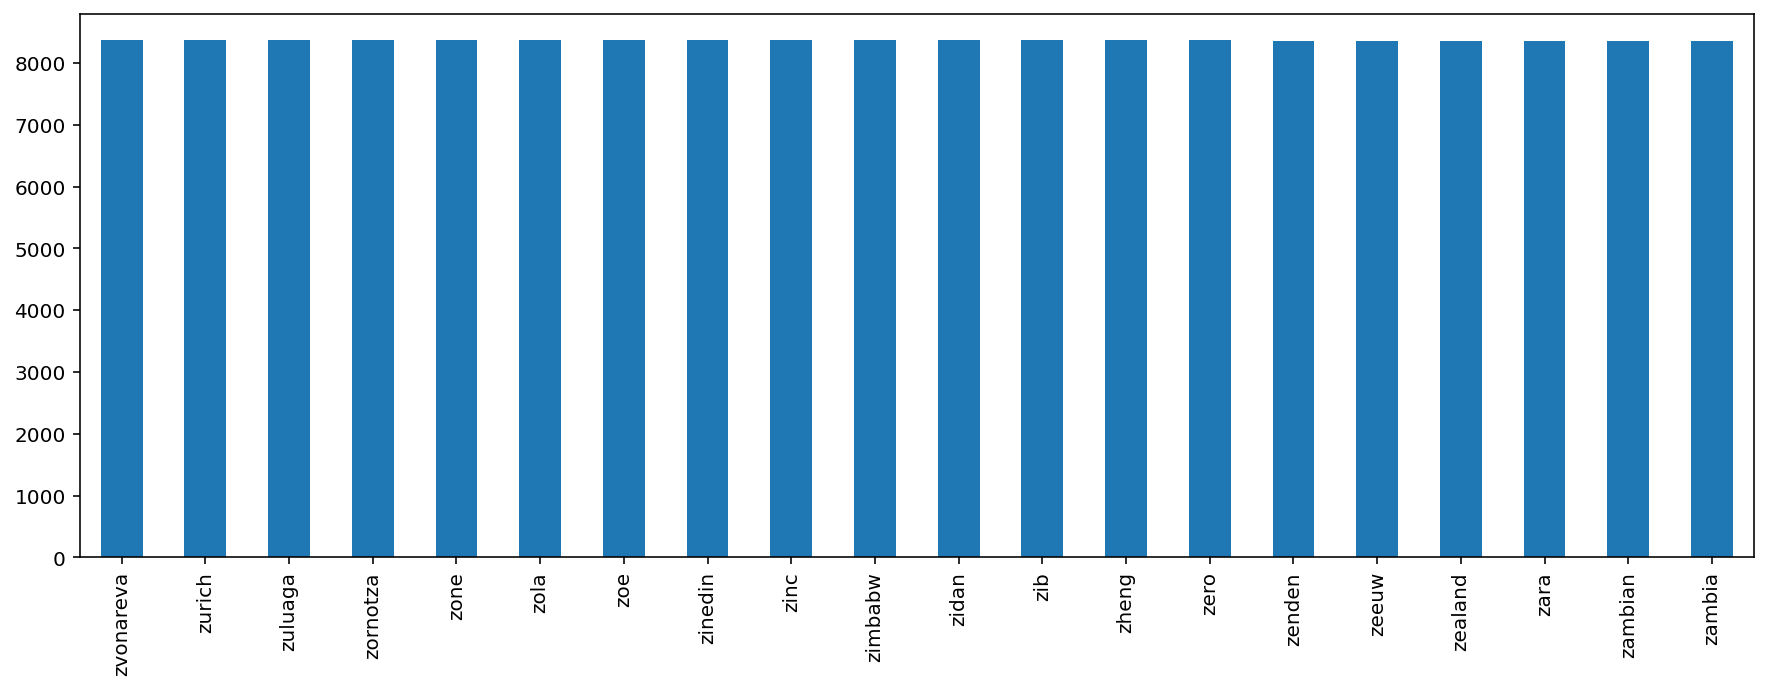

In [39]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

#Count of words in Tech data

In [40]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words = 'english')

# fit the vectorizer using the text data
tfid_vectorizer.fit(Tech_data['news'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

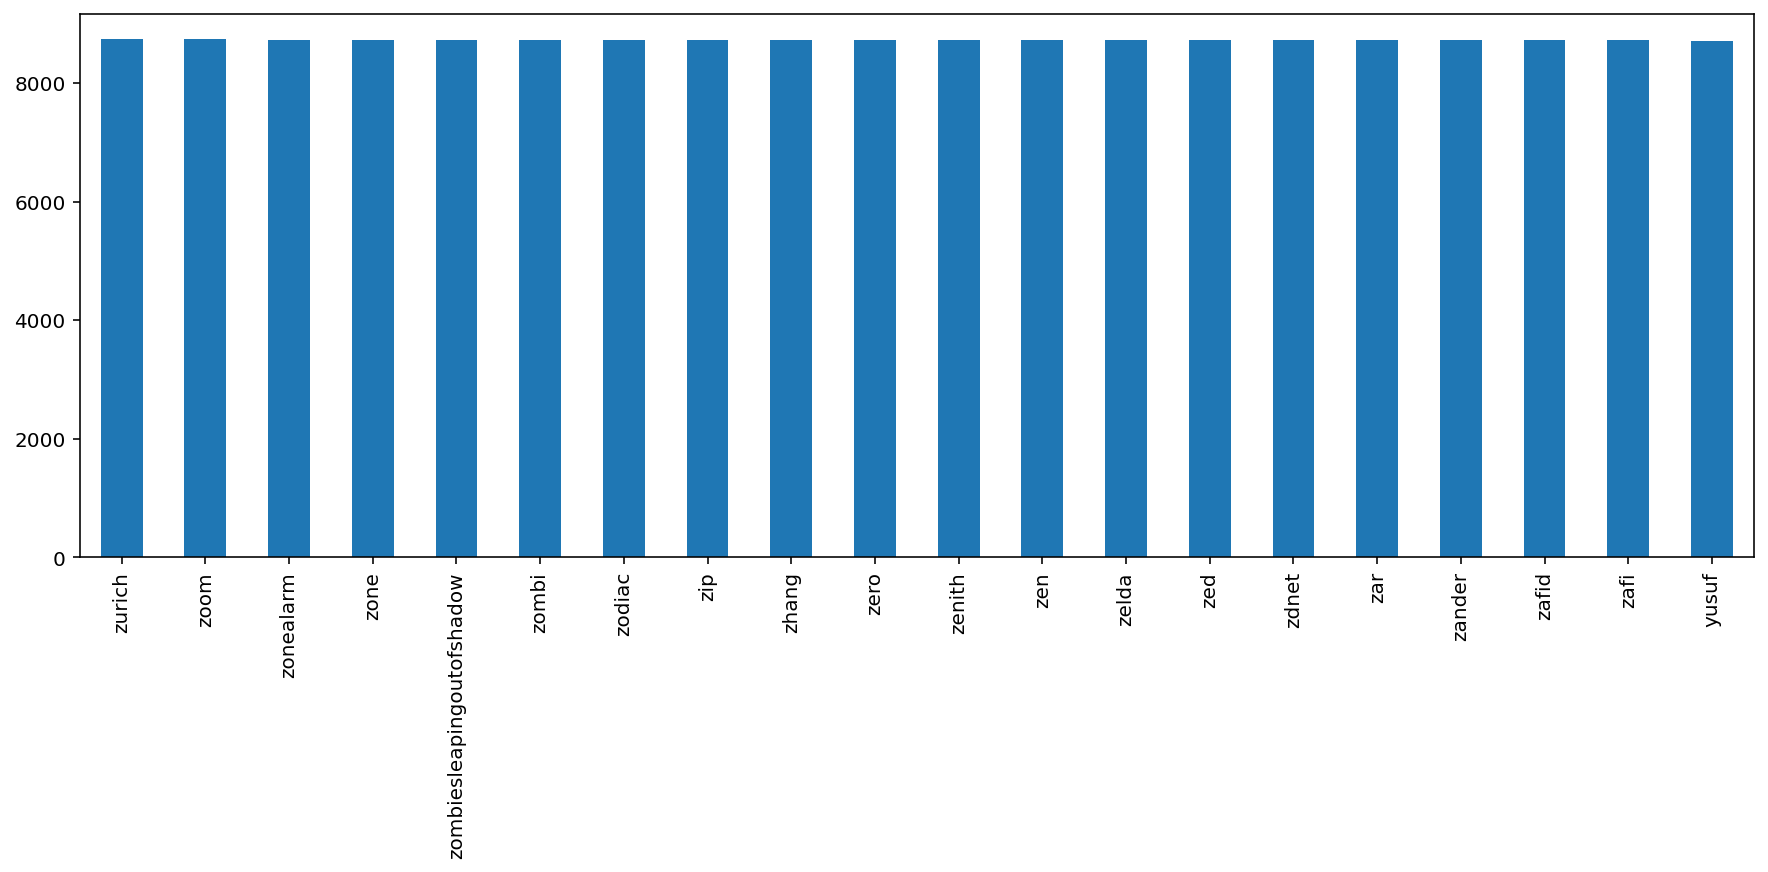

In [41]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

#Word Cloud

In [42]:
from wordcloud import WordCloud ,STOPWORDS

In [43]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

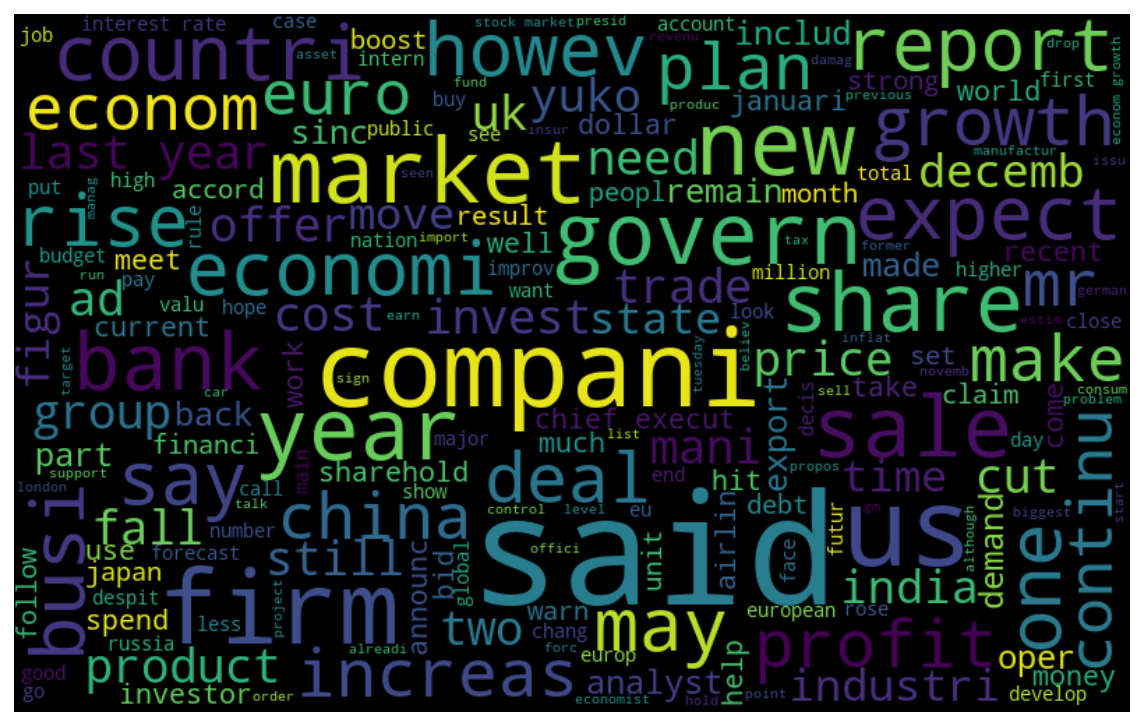

In [44]:
subset=data[data.type=="business"]
text=subset.news.values
words =" ".join(text)
create_wordcloud(words)

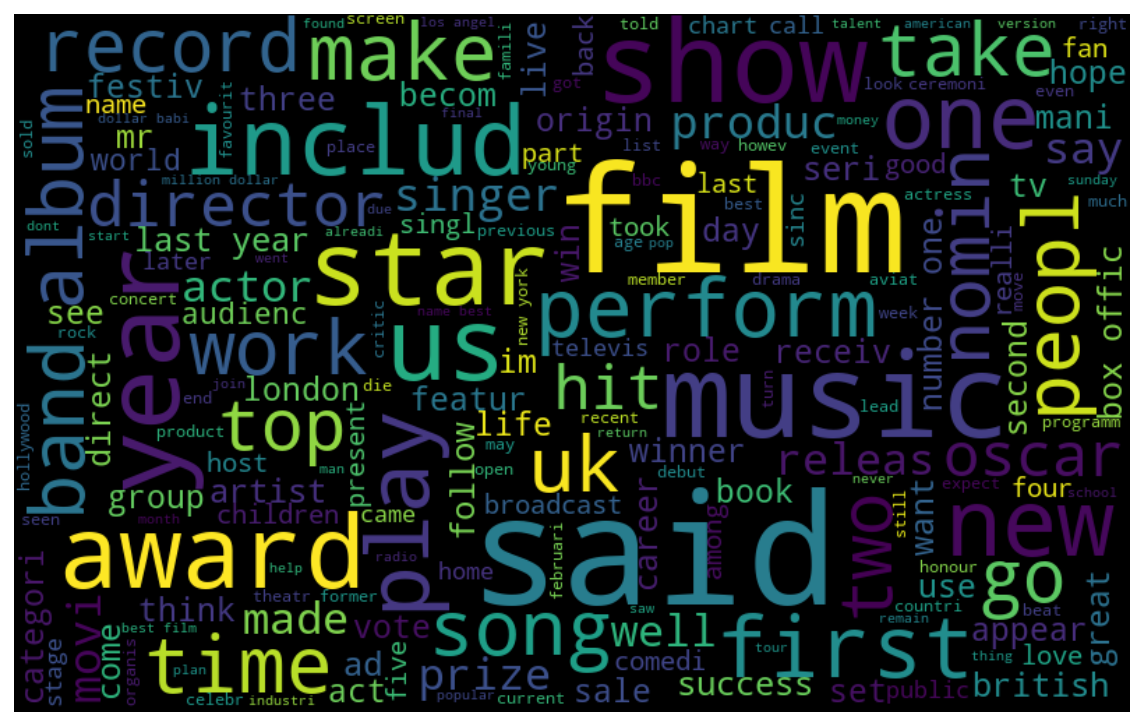

In [45]:
subset=data[data.type=="entertainment"]
text=subset.news.values
words =" ".join(text)
create_wordcloud(words)

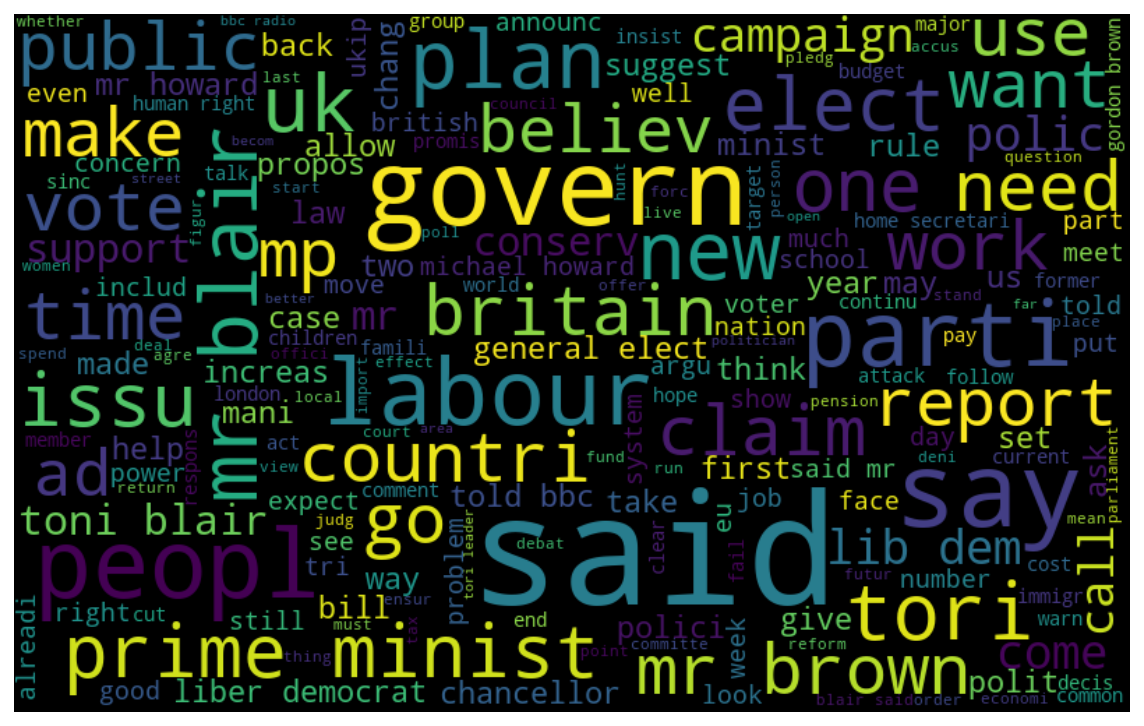

In [46]:
subset=data[data.type=="politics"]
text=subset.news.values
words =" ".join(text)
create_wordcloud(words)

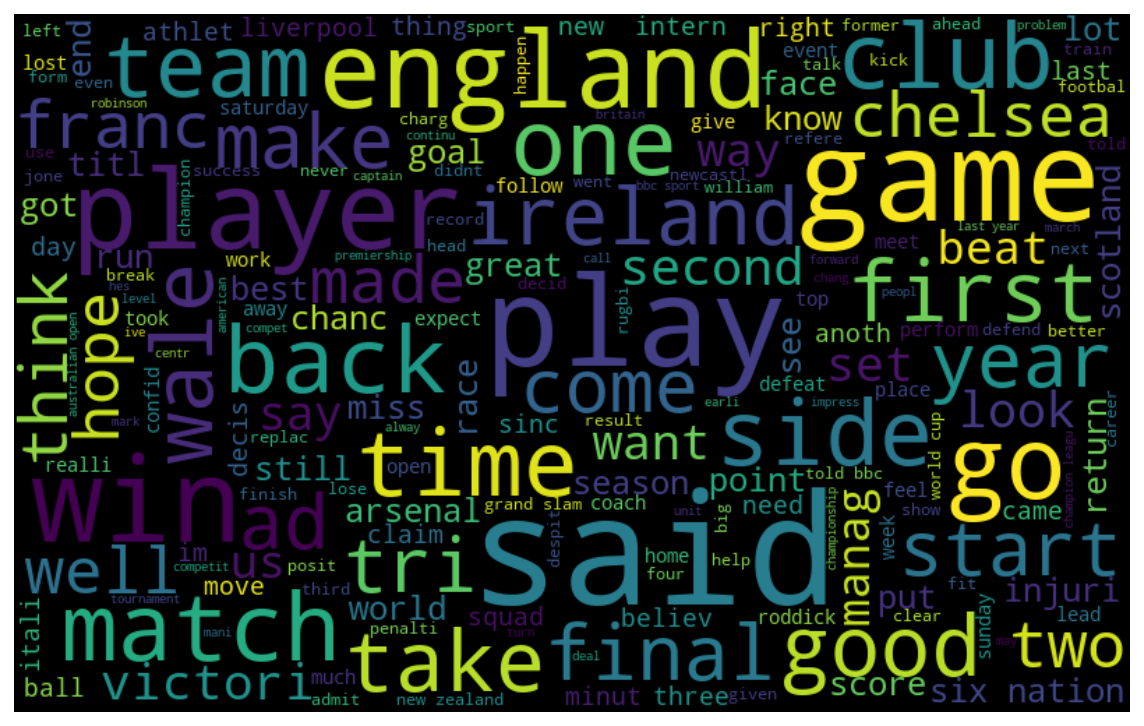

In [47]:
subset=data[data.type=="sport"]
text=subset.news.values
words =" ".join(text)
create_wordcloud(words)

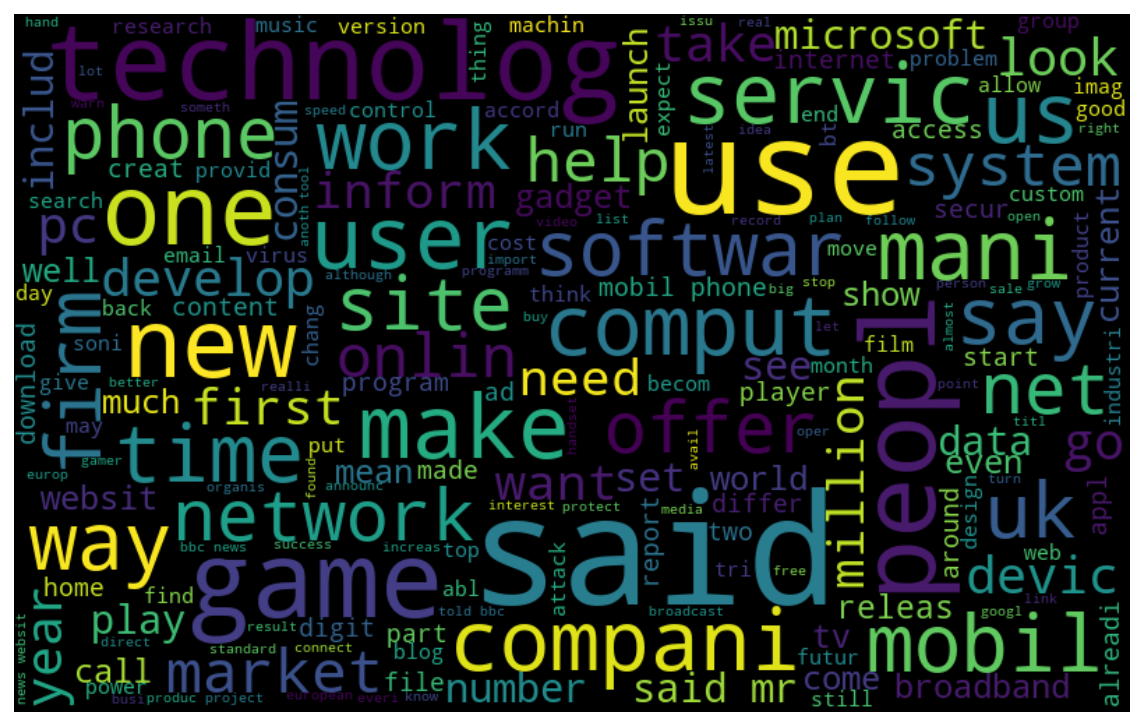

In [48]:
subset=data[data.type=="tech"]
text=subset.news.values
words =" ".join(text)
create_wordcloud(words)

#Topic Modeling

In [66]:
df = data.copy()

In [67]:
df.head()

Unnamed: 0                                               news      type  \
0           0  yuko unit buyer face loan claim owner embattl ...  business   
1           1  ad sale boost time warner profit quarter profi...  business   
2           2  dollar gain greenspan speech dollar hit highes...  business   
3           3  us trade gap hit record 2004 gap us export imp...  business   
4           4  high fuel price hit bas profit british airway ...  business   

   News_length  length  
0         1557    1005  
1         2569    1626  
2         2258    1458  
3         1960    1272  
4         2411    1620

In [68]:
df2 = df[['news']]

In [69]:
df2.head()

news
0  yuko unit buyer face loan claim owner embattl ...
1  ad sale boost time warner profit quarter profi...
2  dollar gain greenspan speech dollar hit highes...
3  us trade gap hit record 2004 gap us export imp...
4  high fuel price hit bas profit british airway ...

In [70]:
vectorizer = TfidfVectorizer(max_df=0.8, max_features=8000,min_df=0.05)

In [71]:
matrix=vectorizer.fit_transform(df2['news'])

In [72]:
df1 = pd.DataFrame(matrix.todense() , columns=vectorizer.get_feature_names())

In [73]:
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.model_selection import GridSearchCV
grid_params = {'n_components' : list(range(5,10))}
model=LatentDirichletAllocation()
lda_model = GridSearchCV(model,param_grid=grid_params)
lda_model.fit(matrix)
best_lda_model = lda_model.best_estimator_
print("Best LDA model's params" , lda_model.best_params_)

Best LDA model's params {'n_components': 5}


In [57]:
lda_topic_matrix= best_lda_model.transform(matrix)

In [58]:
doc = pd.DataFrame(best_lda_model.transform(matrix))

In [59]:
doc.columns=['topic1','topic2','topic3','topic4','topic5']

In [60]:
from collections import Counter
# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [61]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [62]:
from sklearn.manifold import TSNE
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2225 samples in 0.003s...
[t-SNE] Computed neighbors for 2225 samples in 0.077s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2225
[t-SNE] Computed conditional probabilities for sample 2000 / 2225
[t-SNE] Computed conditional probabilities for sample 2225 / 2225
[t-SNE] Mean sigma: 0.002171
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.327065
[t-SNE] KL divergence after 2000 iterations: 0.214978


In [78]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=591018cd74234694cd3e4cbfcedec5a3960838a76b557bf6aeb8e4e24acfb702
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [79]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [80]:
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model,matrix,vectorizer,mds='tsne')
lda_panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  33.977997
1       51.163364 -159.968018       2        1  23.190779
0      -73.144554   21.523815       3        1  21.397913
3      -66.410133 -110.606438       4        1  18.220657
2       54.417324   12.443444       5        1   3.212653, topic_info=        Term       Freq       Total Category  logprob  loglift
626      tax  40.000000   40.000000  Default  30.0000  30.0000
98     brown  34.000000   34.000000  Default  29.0000  29.0000
293   govern  54.000000   54.000000  Default  28.0000  28.0000
214    elect  40.000000   40.000000  Default  27.0000  27.0000
351   labour  42.000000   42.000000  Default  26.0000  26.0000
..       ...        ...         ...      ...      ...      ...
456    parti   3.538679   39.360430   Topic5  -4.9353   1.0291
95   britain   2.882457   26.677072   Topic5  -5.1405   1.2129
699    would   4.218060   77.256974   Topic5  -4.7597   0.5303
422       mr   3.979310  103.183631   Topic5  -4.8180   0.1827
512     rais   2.435680   19.097478   Topic5  -5.3089   1.3787

[250 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
10        1  0.170892    2004
10        2  0.569640    2004
10        3  0.085446    2004
10        4  0.170892    2004
18        1  0.220790  access
...     ...       ...     ...
701       1  0.327709    year
701       2  0.351117    year
701       3  0.175559    year
701       4  0.128743    year
701       5  0.011704    year

[666 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 1, 4, 3])